In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Step 1: Generate Random Data

### • Choose your distribution and specify the parameters.
### • Generate at least 100 data points.
### • Plot the data points on a 2D scatter plot. plot.

In [2]:
# determining the values of the parameters (mean and variance)
mu = 0      #mean
sigma = 1   #variance
n = 100     #total points
alpha = 1   #slope
beta = 2    #intercept

# using the np.random.normal() method for generating 100 random data points.
random_data_points_x = [np.random.normal(mu, sigma) for i in range(0,n)]
# using simple linear regression formula {y = a ∗ x + b + epsilon} for calculating corrosponding y values.
random_data_points_y = [(alpha*i)+beta+np.random.normal(0,0.5) for i in random_data_points_x]

**np.random.normal :** https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

np.random.normal is a function from the NumPy library in Python that helps you create random numbers that follow a normal distribution (also known as a Gaussian distribution). This kind of distribution is very common in statistics and represents how many real-world phenomena behave (like heights, test scores, etc.).

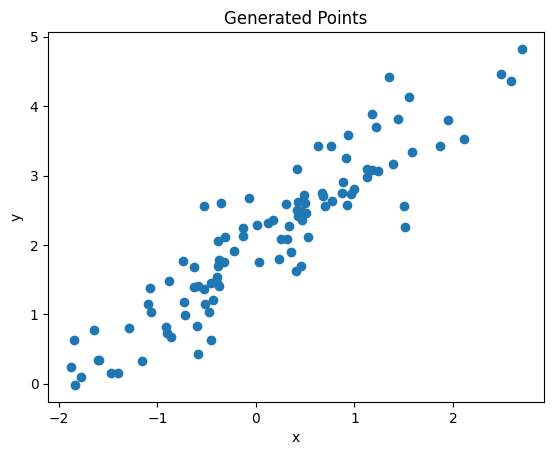

In [3]:
plt.scatter(random_data_points_x,random_data_points_y) #Scatter plot
plt.xlabel("x") #x label
plt.ylabel("y") #y label
plt.title("Generated Points") #title
plt.show()

# Step 2: Perform Linear Regression Without Neural Networks

### • Fit a linear regression model to the data.
### • Plot the regression line.
### • Comment on the mathematical operations used (e.g., computing the best fit line).

Intercept: 1.9932993316934333
Coefficient: [0.98372427]


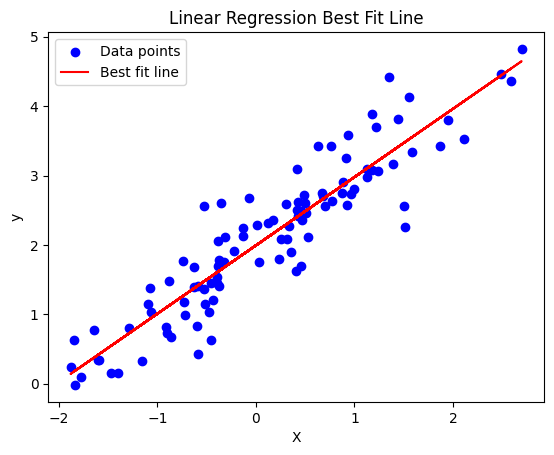

In [4]:
#Creating linear regression object
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(np.array(random_data_points_x).reshape(-1,1), random_data_points_y)
# Print the parameters
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_}")
#predicting the ouput using linear regression model
y_pred_lin_reg = lin_reg.predict(np.array(random_data_points_x).reshape(-1,1))
# Plotting the best fit line and data points
plt.scatter(random_data_points_x, random_data_points_y, color="blue", label="Data points")
plt.plot(random_data_points_x, y_pred_lin_reg, color="red", label="Best fit line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Best Fit Line")
plt.show()

In [5]:
print("Intercept : {}\nCoefficient : {}".format(lin_reg.intercept_,lin_reg.coef_[0]))

Intercept : 1.9932993316934333
Coefficient : 0.983724272133387


**LinearRegression() :** https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html

## Linear Regression Equation for One Feature

The linear regression equation for a model with a single feature (input) can be expressed as:

\[ 
y = mx + b 
\]

\[ 
y = 0.9601x + 1.999 
\]

Where:
- \( y \) = Predicted output (dependent variable)
- \( x \) = Input feature (independent variable)
- \( m \) = Coefficient (slope) of the feature, indicating the change in \( y \) for a one-unit change in \( x \)
- \( b \) = Intercept, representing the value of \( y \) when \( x = 0 \)

### Interpretation:

- The **slope \( m \)** indicates how much the predicted value \( y \) changes with a one-unit increase in \( x \).
- The **intercept \( b \)** provides the starting value of \( y \) when there is no influence from \( x \).

This equation models a straight line in a two-dimensional space where the x-axis represents the feature and the y-axis represents the target variable.


In [6]:
#Calculating the final linear regression model loss
line_reg_loss = mean_squared_error(random_data_points_y, y_pred_lin_reg)
line_reg_loss

0.18555721370041708

# Step 3: Perform Linear Regression Using a Neural Network (Single Dense Layer)

### • Build a neural network with 1 dense layer.
### • Train it using a suitable optimizer and loss function (e.g., mean squared error).
### • Plot the predicted line and compare with the linear regression model.
### • Explain why the ‘Dense‘ layer works for this task and comment on the loss function used.

4/4 [==============================] - 0s 0s/step


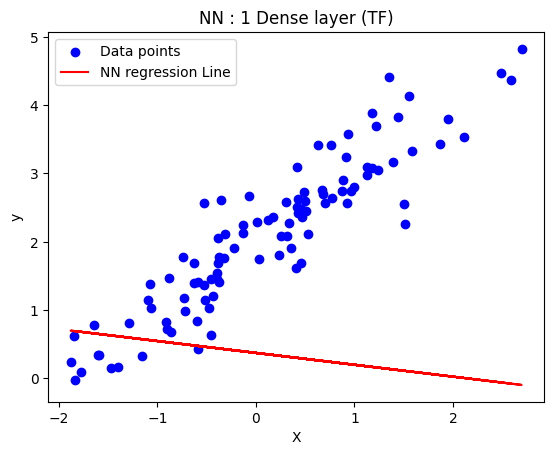

In [7]:
#initializing the model
model = Sequential()
#Adding dense layer to the model with 1 neuron and 1 input. Activation function is linear
model.add(Dense(1,input_dim = 1,activation="linear"))
#Compiling the model by optimizing the loss using ADAM optimizer and loss is calculated using MSE.
model.compile(optimizer='adam',loss='mean_squared_error')
#Training the model over 100 epochs
model.fit(random_data_points_x,random_data_points_y,epochs = 100, verbose = 0)
#Predicting the output using trained model
y_pred_one_layer = model.predict(random_data_points_x)
#Plotting the output
plt.scatter(random_data_points_x, random_data_points_y, color="blue", label="Data points")
plt.plot(random_data_points_x,y_pred_one_layer, color="red", label="NN regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("NN : 1 Dense layer (TF)")
plt.show()

**Tensorflow Sequential() :** https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

## 1. `Sequential()`
The `Sequential()` model in TensorFlow is a simple way to build a neural network layer by layer. Think of it like stacking building blocks, where each block is a layer of the network that processes the input data

## 2. `model.add()`
The `model.add()` method is used to add layers to the neural network. Each layer has a specific function, such as learning patterns or making predictions. For example, you might add a layer that helps recognize images or predict numbers. You can keep adding layers until the model is as complex as needed.

In a Dense layer, every neuron (node) in the layer is connected to every neuron in the previous layer. This connectivity allows the model to learn complex representations of the input data, capturing intricate relationships between the input features and the output predictions.

## Why Dense Layer works?

In a Dense layer, every neuron (node) in the layer is connected to every neuron in the previous layer. This connectivity allows the model to learn complex representations of the input data, capturing intricate relationships between the input features and the output predictions.

## Comment on Mean Squared Error (MSE)

Mean Squared Error (MSE) is a widely used loss function for regression tasks. It measures the average squared difference between predicted and actual values, making it sensitive to large errors. This property is beneficial as it emphasizes minimizing significant deviations in predictions. 

### Key Points:
- **Sensitivity**: Due to squaring the errors, MSE penalizes larger errors more heavily, promoting accuracy in predictions.
- **Smooth Gradient**: MSE provides a continuous and smooth gradient, which aids in efficient optimization during model training.
- **Interpretability**: A lower MSE indicates better model performance, making it easy to gauge the effectiveness of the regression model.

In summary, MSE is a robust choice for evaluating regression models due to its sensitivity to errors and ease of interpretation.


# Step 4: Experiment with Multiple Layers

### • Build neural networks with 1, 2, 3, and 4 layers.
### • Train each model and plot the predictions.

In [8]:
x = np.array(random_data_points_x)
y = np.array(random_data_points_y)

4/4 [==============================] - 0s 0s/step


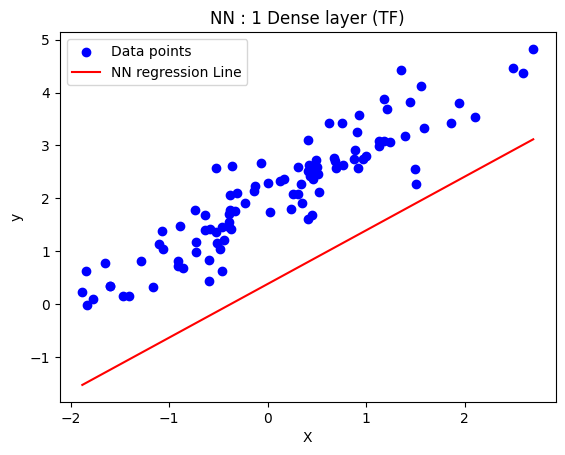

In [9]:
#initializing the model
model = Sequential()
#Adding dense layer to the model with 1 neuron and 1 input. Activation function is linear
model.add(Dense(1,input_dim = 1,activation="linear"))
#Compiling the model by optimizing the loss using ADAM optimizer and loss is calculated using MSE.
model.compile(optimizer='adam',loss='mean_squared_error')
#Training the model over 100 epochs
one_layer_nn_history = model.fit(random_data_points_x,random_data_points_y,epochs = 100, verbose = 0)
#Predicting the output using trained model
y_pred_one_layer = model.predict(random_data_points_x)

#Sorting the predicted values 
df = pd.DataFrame()
df["x"] = random_data_points_x
df["y"] = y_pred_one_layer.flatten().tolist()
sorted_df = df.sort_values(by='y', ascending=True)


plt.scatter(random_data_points_x, random_data_points_y, color="blue", label="Data points")
plt.plot(list(sorted_df["x"]),list(sorted_df["y"]), color="red", label="NN regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("NN : 1 Dense layer (TF)")
plt.show()

4/4 [==============================] - 0s 1ms/step


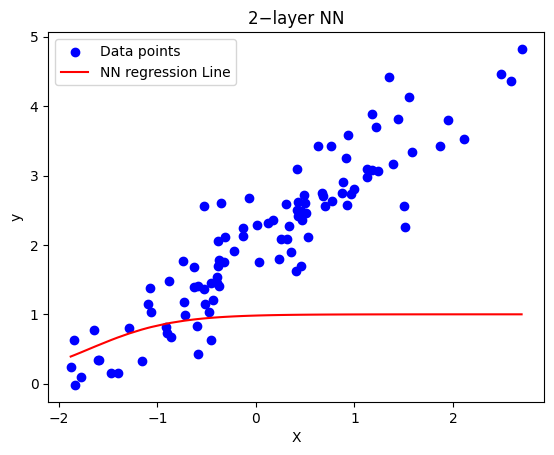

In [10]:
#initializing the model
model = Sequential()
#Adding dense layer to the model with 64 neuron and 1 input. Activation function is linear
model.add(Dense(64,input_dim = 1,activation="linear"))
#Adding dense layer to the model with 1 neuron. Activation function is Sigmoid
model.add(Dense(1,activation="sigmoid"))
#Compiling the model by optimizing the loss using ADAM optimizer and loss is calculated using MSE.
model.compile(optimizer='adam',loss='mean_squared_error')
#Training the model over 100 epochs
two_layer_nn_history = model.fit(x,y,epochs = 100, verbose = 0)
#Predicting the output using trained model
y_pred_two_layer = model.predict(x)

#Sorting the predicted values 
df = pd.DataFrame()
df["x"] = random_data_points_x
df["y"] = y_pred_two_layer.flatten().tolist()
sorted_df_1 = df.sort_values(by='y', ascending=True)

plt.scatter(x, y, color="blue", label="Data points")
plt.plot(list(sorted_df_1["x"]),list(sorted_df_1["y"]), color="red", label="NN regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("2−layer NN")
plt.show()

4/4 [==============================] - 0s 0s/step


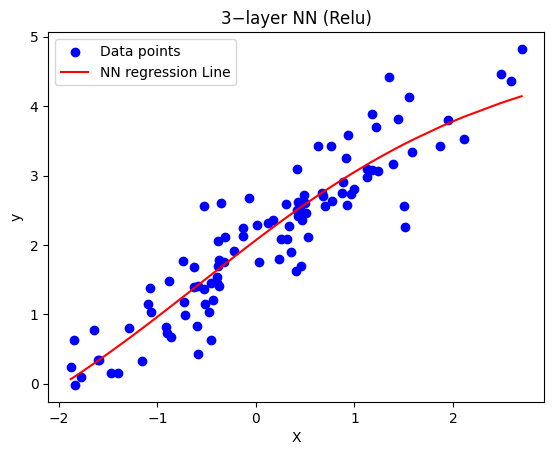

In [11]:
#initializing the model
model = Sequential()
#Adding dense layer to the model with 64 neuron and 1 input. Activation function is linear
model.add(Dense(64,input_dim = 1,activation="linear"))
#Adding dense layer to the model with 32 neuron. Activation function is sigmoid
model.add(Dense(32,activation="sigmoid"))
#Adding dense layer to the model with 1 neuron. Activation function is linear
model.add(Dense(1,activation="linear"))
#Compiling the model by optimizing the loss using ADAM optimizer and loss is calculated using MSE.
model.compile(optimizer='adam',loss='mean_squared_error')
#Training the model over 100 epochs
three_layer_nn_history = model.fit(x,y,epochs = 100, verbose = 0)
#Predicting the output using trained model
y_pred_three_layer = model.predict(x)

#Sorting the predicted values 
df = pd.DataFrame()
df["x"] = random_data_points_x
df["y"] = y_pred_three_layer.flatten().tolist()
sorted_df_2 = df.sort_values(by='y', ascending=True)

plt.scatter(x, y, color="blue", label="Data points")
plt.plot(list(sorted_df_2["x"]),list(sorted_df_2["y"]), color="red", label="NN regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("3−layer NN (Relu)")
plt.show()

4/4 [==============================] - 0s 0s/step


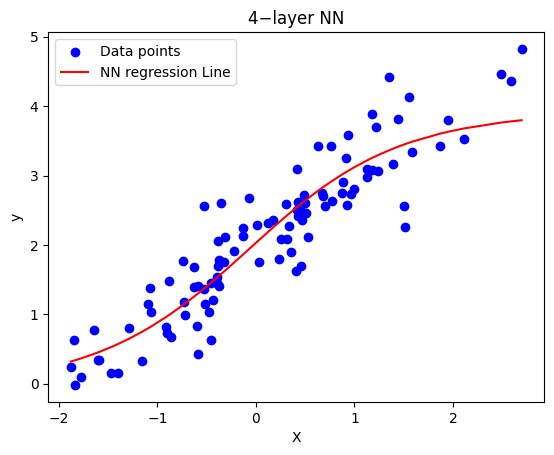

In [12]:
#initializing the model
model = Sequential()
#Adding dense layer to the model with 64 neuron and 1 input. Activation function is linear
model.add(Dense(64,input_dim = 1,activation="linear"))
#Adding dense layer to the model with 32 neuron. Activation function is sigmoid
model.add(Dense(32,activation="sigmoid"))
#Adding dense layer to the model with 1 neuron. Activation function is sigmoid
model.add(Dense(32,activation="sigmoid"))
#Adding dense layer to the model with 1 neuron. Activation function is linear
model.add(Dense(1,activation="linear"))
#Compiling the model by optimizing the loss using ADAM optimizer and loss is calculated using MSE.
model.compile(optimizer='adam',loss='mean_squared_error')
#Training the model over 100 epochs
four_layer_nn_history = model.fit(x,y,epochs = 100, verbose = 0)
#Predicting the output using trained model
y_pred_four_layer = model.predict(x)

#Sorting the predicted values 
df = pd.DataFrame()
df["x"] = random_data_points_x
df["y"] = y_pred_four_layer.flatten().tolist()
sorted_df_3 = df.sort_values(by='y', ascending=True)

plt.scatter(x, y, color="blue", label="Data points")
plt.plot(list(sorted_df_3["x"]),list(sorted_df_3["y"]), color="red", label="NN regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("4−layer NN")
plt.show()

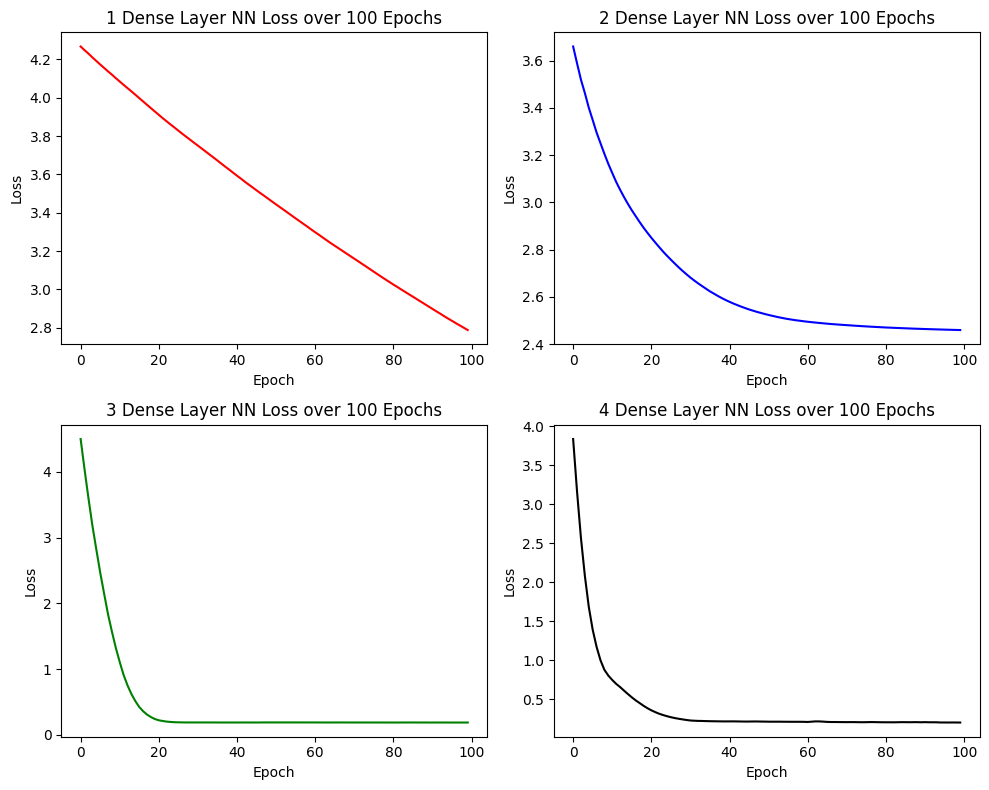

In [13]:
# Creating a 2x2 plot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# First plot
axs[0, 0].plot(one_layer_nn_history.history["loss"],'r')
axs[0, 0].set_title('1 Dense Layer NN Loss over 100 Epochs')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
# Second plot
axs[0, 1].plot(two_layer_nn_history.history["loss"],'b')
axs[0, 1].set_title('2 Dense Layer NN Loss over 100 Epochs')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
# Third plot
axs[1, 0].plot(three_layer_nn_history.history["loss"],'g')
axs[1, 0].set_title('3 Dense Layer NN Loss over 100 Epochs')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss')
# Fourth plot
axs[1, 1].plot(four_layer_nn_history.history["loss"],'k')
axs[1, 1].set_title('4 Dense Layer NN Loss over 100 Epochs')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Loss')
# Adjusting layout
plt.tight_layout()
plt.show()

### Compare the performance of each model (e.g., using Mean Squared Error)and display the results on a plot.

#### Overall Observations:

- All four neural networks exhibit a **decreasing loss** over the 100 epochs, indicating that they are learning effectively from the data.
- The general trend shows that the **loss decreases more rapidly** in the initial epochs and then **plateaus**, suggesting that the models are reaching their **optimal performance**.

**1 Dense Layer NN**: The loss decreases steadily but relatively slowly.

**2 Dense Layer NN**: The loss decreases more rapidly than the 1-layer network, suggesting that the additional layer is improving performance.

**3 Dense Layer NN**: The loss initially decreases very rapidly but then plateaus at a higher level than the 2-layer network. This could indicate overfitting, where the model is learning the training data too well and may not generalize well to new data.

**4 Dense Layer NN**: The loss decreases steadily and plateaus at a relatively low level. This suggests that the 4-layer network is finding a good balance between learning the training data and generalizing to new data.


#### Conclusions:

- Based on the loss curves, the **4 Dense Layer Neural Network** appears to be the best performer among the models tested.
- Increasing the number of layers can improve performance, but there is a risk of **overfitting**.
- It would be beneficial to experiment with different hyperparameters (e.g., **learning rate, regularization**) to further optimize the performance of these models.


### Explain how adding layers changes the model’s performance and complexity.

#### Impact of Adding Layers on Model Performance and Complexity

Adding layers to a neural network can significantly influence its performance and complexity.

#### Performance Impact:

- **Increased Capacity**:  
  Deeper networks have a greater capacity to learn complex patterns and relationships in the data. This is because they can represent more intricate functions.

- **Improved Feature Extraction**:  
  Each layer can learn to extract different features from the input data. As the network deepens, it can learn more abstract and higher-level features, leading to better performance on tasks that require understanding complex patterns.

- **Potential for Overfitting**:  
  While deeper networks can improve performance, they also introduce the risk of overfitting. Overfitting occurs when the model learns the training data too well, leading to poor generalization to new, unseen data. This is especially likely in deep networks with many parameters.


**Risk of Overfitting:** Adding too many layers increases the risk of overfitting as you can see in the above plot, especially for small datasets or simpler problems like this where we had only 100 data points to train on. The model might memorize the training data rather than generalizing well to unseen data. Regularization techniques (like dropout, weight decay) can help mitigate this.

**Computational Complexity:** More layers mean more parameters, which increases training time and the need for computational resources (GPU, memory).

# Step 5: Compare and Visualize the Results

### • Plot all models on the same graph to compare their performance.
### • Calculate the Mean Squared Error (MSE) for each model and report it.
### • Write an explanation comparing the different models, especially in terms of complexity and performance.

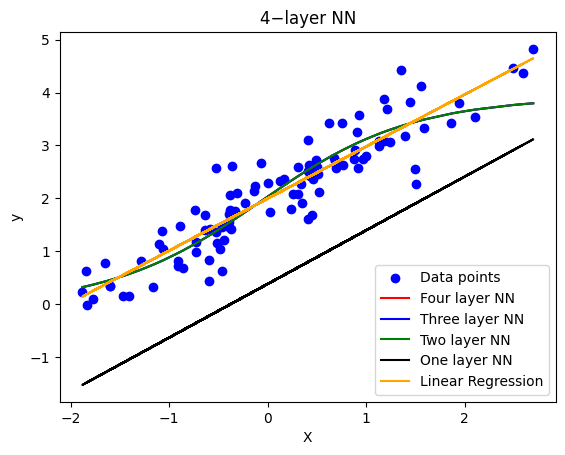

In [14]:
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(list(sorted_df_3["x"]),list(sorted_df_3["y"]), color="red", label="Four layer NN")
plt.plot(list(sorted_df_2["x"]),list(sorted_df_3["y"]), color="blue", label="Three layer NN")
plt.plot(list(sorted_df_1["x"]),list(sorted_df_3["y"]), color="green", label="Two layer NN")
plt.plot(x,y_pred_one_layer, color="black", label="One layer NN")
plt.plot(x,y_pred_lin_reg, color="orange", label="Linear Regression")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("4−layer NN")
plt.show()

In [15]:
mse_linear = mean_squared_error(y,y_pred_lin_reg)
mse_one_layer = mean_squared_error(y,y_pred_one_layer)
mse_two_layer = mean_squared_error(y,y_pred_two_layer)
mse_three_layer = mean_squared_error(y,y_pred_three_layer)
mse_four_layer = mean_squared_error(y,y_pred_four_layer)

In [16]:
# Creating a DataFrame to display the results in tabular format
mse_data = {
    "Model": ["Linear Regression", "1-Layer NN", "2-Layer NN", "3-Layer NN", "4-Layer NN"],
    "MSE": [mse_linear, mse_one_layer, mse_two_layer, mse_three_layer, mse_four_layer]
}

mse_df = pd.DataFrame(mse_data)

mse_df

,Model,MSE
0,Linear Regression,0.185557
1,1-Layer NN,2.779254
2,2-Layer NN,2.458847
3,3-Layer NN,0.187899
4,4-Layer NN,0.201936


## Performance Impact:

- **Linear Regression**: The model has the lowest MSE, indicating it performs well on this dataset. This suggests that the relationship between the input features and the target variable may be primarily linear.

- **1-Layer Neural Network**: This model performs poorly, with a significantly higher MSE compared to the Linear Regression. This indicates it may be underfitting the data and not capturing the underlying patterns effectively.

- **2-Layer Neural Network**: The performance improves, with an MSE close to that of Linear Regression. This suggests that the added layer helps the model to better capture complex relationships in the data.

- **3-Layer Neural Network**: The MSE decreases slightly compared to the 2-Layer NN, indicating good fit as the model becomes more complex.

- **4-Layer Neural Network**: The performance slightly deteriorates further, suggesting that the model may be overfitting the training data, leading to a higher error on the same dataset.

## Complexity Impact:

- **Model Complexity**: As the number of layers increases, the complexity of the model also increases, leading to more parameters to learn. This can make training more challenging and increase the risk of overfitting.

- **Training Time**: More complex models (3-Layer and 4-Layer NNs) may require longer training times, consuming more computational resources compared to simpler models (Linear Regression and 1-Layer NN).

- **Generalization**: While deeper networks have the capacity to learn complex patterns, they also introduce the risk of poor generalization to new, unseen data, as indicated by the increasing MSE for the 3-Layer and 4-Layer NNs.